In [2]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import traceback

from experiments.causal_trace import plot_trace_heatmap

In [3]:
relations = "P101 P103 P106 P127 P131 P136 P1376 P138 P140 P1412 P159 \
P176 P178 P17 P19 P20 P264 P276 P279 P27 P30 P361 P364 P36 P407 P413 P449 P495 P740 P937".split()

In [4]:
def get_job_id(rel):
    if rel in ["P101", "P103"]:
        return "1658744"
    elif rel in ["P106", "P127", "P131", "P136", "P1376", "P138", "P140", "P1412", 
                 "P159", "P176", "P178", "P17", "P19", "P20", "P264", "P276", "P279"]:
        return "1658974"
    elif rel in ["P27", "P30", "P361", "P364", "P36", "P407", 
                 "P413", "P449", "P495", "P740", "P937"]:
        return "1663023"
    else: return None

P106
P127


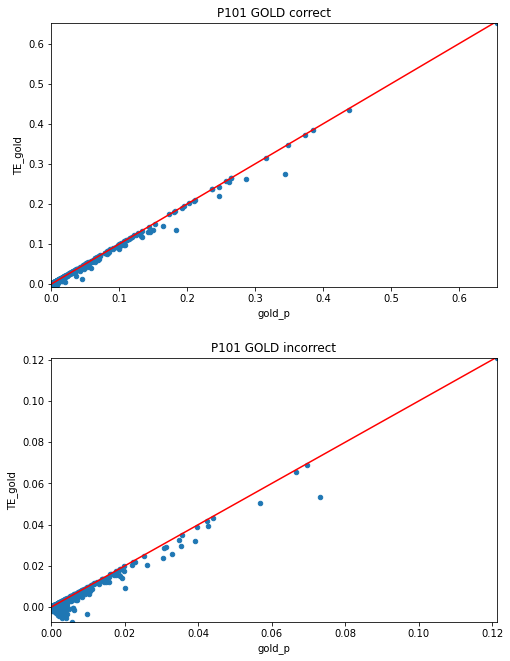

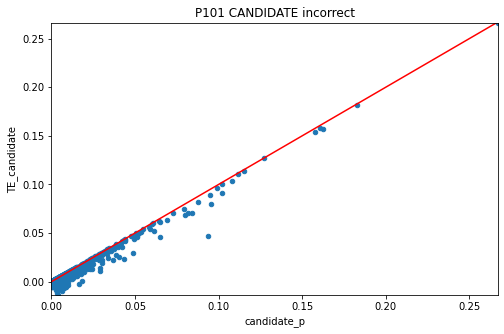

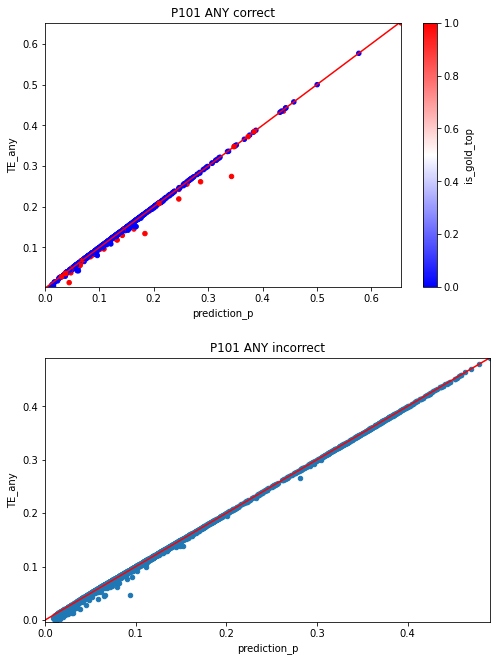

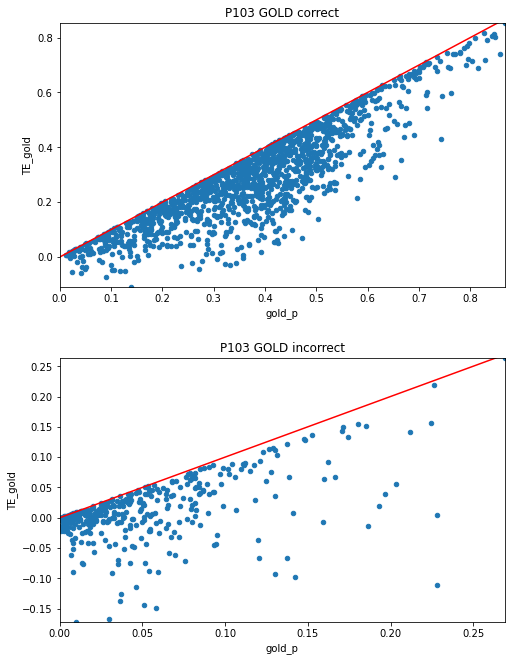

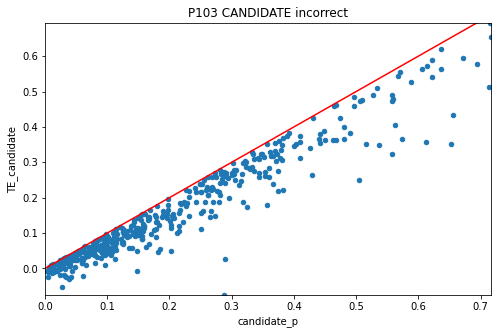

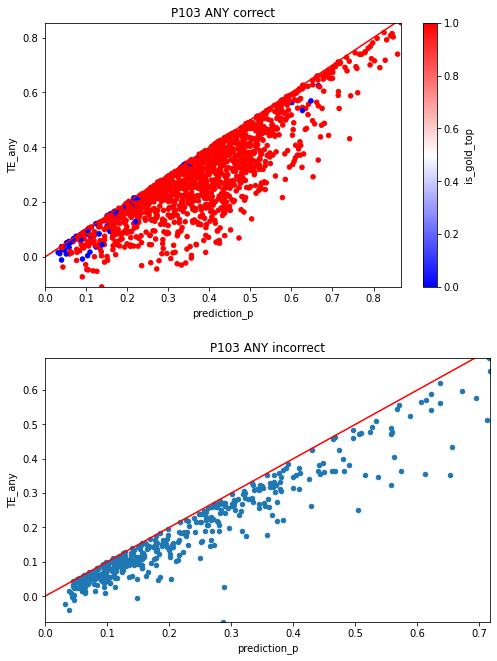

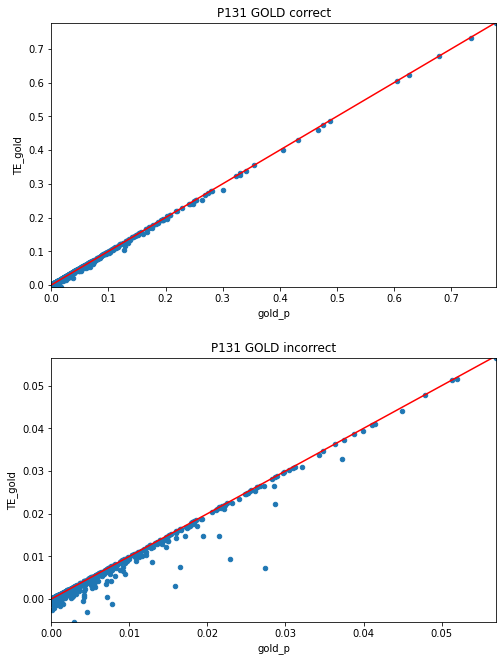

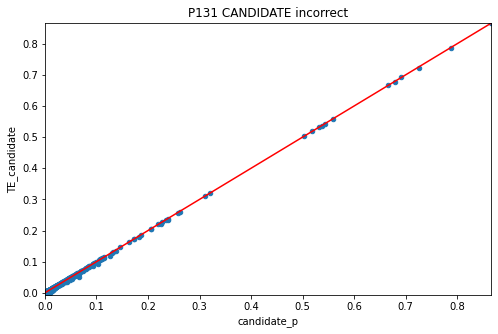

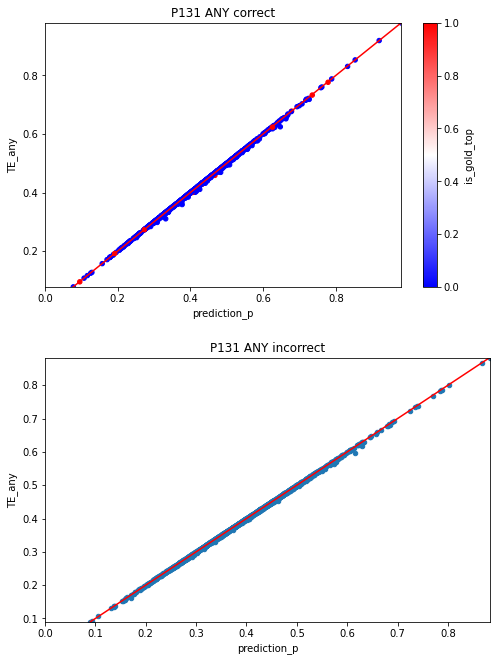

In [12]:
for rel in relations[0:5]: #relations[0:1]:
    #rel="P19"
    job_id = get_job_id(rel)
    try:
        query_file = "/mimer/NOBACKUP/groups/dsaynova/ROME/rome/data/"+rel+"_gpt2_xl_preds.jsonl"
        results_folder = "/mimer/NOBACKUP/groups/dsaynova/ROME/rome/data/results/gpt2-xl/causal_trace_pararel_"+job_id+"_"+rel+"_TE/cases/"
        queries = []
        with open(query_file) as f:
            for line in f:
                queries.append(json.loads(line))

        #partial results
        #queries_sample = queries[:1000]      
        queries_sample = queries
        for i in queries_sample:
            results = np.load(results_folder+str(i['known_id'])+"_gold.npz", allow_pickle=True)
            i['gold_low'] = results['low_score']
            i['TE_gold'] = i['gold_p'] - i['gold_low']

            results_c = np.load(results_folder+str(i['known_id'])+"_candidate.npz", allow_pickle=True)
            i['candidate_low'] = results_c['low_score']
            i['TE_candidate'] = i['candidate_p'] - i['candidate_low']

            results_a = np.load(results_folder+str(i['known_id'])+"_any.npz", allow_pickle=True)
            i['any_low'] = results_c['low_score']
            i['TE_any'] = i['prediction_p'] - i['any_low']

            i['correct'] = 1 if i['gold_rank'] <= i['candidate_rank'] else 0

        queries_sample_pd = pd.DataFrame(queries_sample)
        
        correct, incorrect = [], []
        for i in queries_sample:
            if i['correct']==1:
                correct.append(i)
            else:
                incorrect.append(i)

        correct_pd = pd.DataFrame(correct)
        correct_pd["is_gold_top"] = np.where(correct_pd['gold_rank']==0, 1, 0)
        incorrect_pd = pd.DataFrame(incorrect)
        
        
        
        ###PLOTTING
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,10))
        fig.tight_layout(pad=5.0)
        correct_pd.plot(kind='scatter', x='gold_p', y='TE_gold',sharex=False,title=rel+" GOLD correct", ax=ax1)
        ax1.plot(range(2),c='r')
        ax1.set_xlim(0, correct_pd.gold_p.max())
        ax1.set_ylim(correct_pd.TE_gold.min(), correct_pd.TE_gold.max())

        incorrect_pd.plot(kind='scatter', x='gold_p', y='TE_gold',sharex=False,title=rel+" GOLD incorrect", ax=ax2)
        ax2.plot(range(2),c='r')
        ax2.set_xlim(0, incorrect_pd.gold_p.max())
        ax2.set_ylim(incorrect_pd.TE_gold.min(), incorrect_pd.TE_gold.max())
        plt.savefig('/mimer/NOBACKUP/groups/dsaynova/ROME/rome/data/results/TE/'+rel+'_gold.png')

                
        fig, ax = plt.subplots(figsize=(8,5))
        incorrect_pd.plot(kind='scatter', x='candidate_p', y='TE_candidate',sharex=False,title=rel+" CANDIDATE incorrect", ax=ax)
        ax.plot(range(2),c='r')
        ax.set_xlim(0, incorrect_pd.candidate_p.max())
        ax.set_ylim(incorrect_pd.TE_candidate.min(), incorrect_pd.TE_candidate.max())
        plt.savefig('/mimer/NOBACKUP/groups/dsaynova/ROME/rome/data/results/TE/'+rel+'_candidate.png')
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,10))
        fig.tight_layout(pad=5.0)
        correct_pd.plot(kind='scatter', x='prediction_p', y='TE_any', c = 'is_gold_top', colormap='bwr',sharex=False,title=rel+" ANY correct", ax=ax1)
        ax1.plot(range(2),c='r')
        ax1.set_xlim(0, correct_pd.prediction_p.max())
        ax1.set_ylim(correct_pd.TE_any.min(), correct_pd.TE_any.max())
        
        incorrect_pd.plot(kind='scatter', x='prediction_p', y='TE_any',sharex=False,title=rel+" ANY incorrect", ax=ax2)
        ax2.plot(range(2),c='r')
        ax2.set_xlim(0, incorrect_pd.prediction_p.max())
        ax2.set_ylim(incorrect_pd.TE_any.min(), incorrect_pd.TE_any.max())
        plt.savefig('/mimer/NOBACKUP/groups/dsaynova/ROME/rome/data/results/TE/'+rel+'_any.png')
        
        
    except Exception:
        print(rel)
        #print(traceback.print_exc())

In [14]:
count = 0
for i in queries_sample:
    if i["correct"] == 1 and i["TE_gold"]<0:
        print(i)
        count+=1
    if count > 20: break

{'subject': 'William Henry Harrison', 'attribute': 'English', 'template': 'The native language of {} is', 'prediction': ' English', 'prompt': 'The native language of William Henry Harrison is', 'relation_id': 'P103', 'known_id': 64, 'prediction_p': 0.09083476, 'candidate_prediction': ' English', 'candidate_p': 0.09083476, 'candidate_rank': 0, 'gold_rank': 0, 'gold_p': 0.09083476, 'gold_low': array(0.1631984), 'TE_gold': -0.07236363656352997, 'candidate_low': array(0.1631984), 'TE_candidate': -0.07236363656352997, 'any_low': array(0.1631984), 'TE_any': -0.07236363656352997, 'correct': 1}
{'subject': 'William Henry Harrison', 'attribute': 'English', 'template': 'The mother tongue of {} is', 'prediction': ' English', 'prompt': 'The mother tongue of William Henry Harrison is', 'relation_id': 'P103', 'known_id': 65, 'prediction_p': 0.15259367, 'candidate_prediction': ' English', 'candidate_p': 0.15259367, 'candidate_rank': 0, 'gold_rank': 0, 'gold_p': 0.15259367, 'gold_low': array(0.1640086